In [105]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import plothist

In [106]:
def get_dff(df):
    df['dff_p'] = df['pIn(MeV/c)'] - df['pOut(MeV/c)']
    df['dff_px'] = df['pxIn(MeV/c)'] - df['pxOut(MeV/c)']
    df['dff_py'] = df['pyIn(MeV/c)'] - df['pyOut(MeV/c)']
    df['dff_pz'] = df['pzIn(MeV/c)'] - df['pzOut(MeV/c)']
    df['dff_time'] = df['tOut(ns)'] - df['tIn(ns)']
    
    pxIn, pyIn = df['pxIn(MeV/c)'].to_numpy(), df['pyIn(MeV/c)'].to_numpy()
    pxOut,pyOut= df['pxOut(MeV/c)'].to_numpy(), df['pyOut(MeV/c)'].to_numpy()
    pzIn, pzOut= df['pzIn(MeV/c)'].to_numpy(), df['pzOut(MeV/c)'].to_numpy()

    ptIn  = np.hypot(pxIn,  pyIn)
    ptOut = np.hypot(pxOut, pyOut)
    df['ptIn(MeV/c)']     = ptIn
    df['ptOut(MeV/c)']    = ptOut
    df['dff_pt(MeV/c)']   = df['ptIn(MeV/c)'] - df['ptOut(MeV/c)']

    # Theta (polar angle from +z): θ = atan2( pT, pz )
    thIn  = np.arctan2(ptIn,  pzIn)
    thOut = np.arctan2(ptOut, pzOut)
    df['thetaIn(rad)']     = thIn
    df['thetaOu(rad)']    = thOut
    df['dff_theta'] = df['thetaIn(rad)'] -df['thetaOu(rad)'] 

    phiIn  = np.arctan2(pyIn,  pxIn)
    phiOut = np.arctan2(pyOut, pxOut)
    dphi = ((phiOut - phiIn + np.pi) % (2*np.pi)) - np.pi
    df['phiIn'], df['phiOut'], df['dff_phi'] = phiIn, phiOut, dphi
    
    return df
    
def get_dff_rel(df):
    df['rdff_p'] = (df['dff_p'])/df['pIn(MeV/c)']
    df['rdff_px'] = (df['dff_px'])/df['pxIn(MeV/c)'] 
    df['rdff_py'] = (df['dff_py'])/df['pyIn(MeV/c)']
    df['rdff_pz'] = (df['dff_pz'])/df['pzIn(MeV/c)']
    df['rdff_pt(MeV/c)']   = (df['dff_pt(MeV/c)'])/df['ptIn(MeV/c)']
    df['rdff_theta'] = df['dff_theta']/df['thetaIn(rad)']
    df['rdff_phi'] =df['dff_phi']/df['phiIn']

    return df


    

In [107]:
particle=['e-','mu-','pi-','kaon-','proton'] 
radius=[170,240,310,350] #unit mm
thickness=[200,300,400,500,600,700,750] #unit um


df ={}
for p in particle:
    df[p]={}
    for r in radius:
        df[p][r]={}
        for th in thickness:
            df[p][r][th] = pd.read_csv(f'Output/Material_study_30k/Silicon_radius_{r}_thickness_{th}_um_particle_{p}.csv') 
            df[p][r][th] = get_dff(df[p][r][th])
            df[p][r][th] = get_dff_rel(df[p][r][th])
            
    

In [108]:
[i for i in df[p][r][th][0:0]]


['event',
 'track',
 'pdg',
 'pxIn(MeV/c)',
 'pyIn(MeV/c)',
 'pzIn(MeV/c)',
 'pIn(MeV/c)',
 'tIn(ns)',
 'pxOut(MeV/c)',
 'pyOut(MeV/c)',
 'pzOut(MeV/c)',
 'pOut(MeV/c)',
 'tOut(ns)',
 'dff_p',
 'dff_px',
 'dff_py',
 'dff_pz',
 'dff_time',
 'ptIn(MeV/c)',
 'ptOut(MeV/c)',
 'dff_pt(MeV/c)',
 'thetaIn(rad)',
 'thetaOu(rad)',
 'dff_theta',
 'phiIn',
 'phiOut',
 'dff_phi',
 'rdff_p',
 'rdff_px',
 'rdff_py',
 'rdff_pz',
 'rdff_pt(MeV/c)',
 'rdff_theta',
 'rdff_phi']

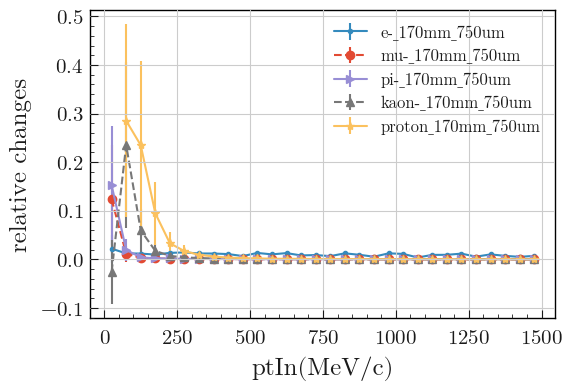

In [179]:
# x_var,y_var,range_x ='pIn(MeV/c)','rdff_p',(0,1500)
# x_var,y_var,range_x ='pzIn(MeV/c)','rdff_pz',(-1500,1500)
x_var,y_var,range_x ='ptIn(MeV/c)','rdff_pt(MeV/c)',(0,1500)
# x_var,y_var,range_x ='thetaIn(rad)','rdff_theta',(0,3.14)
# x_var,y_var,range_x ='phiIn','rdff_phi',(-3.14,3.14)
marker ={'e-':'.-','mu-':'o--','pi-':'>-','kaon-':'^--','proton':'*-'}
plt.figure()
for p in particle:
    # plt.figure()
    for r in [170]:
    # for r in radius:
        for th in [750]:
            # plt.hist(df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um')
            # plt.hist(df[p][r][th][y_var]*100/df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um',bins =100,range =(0, 1))
            
            plot_profile(df[p][r][th],x_var, y_var, 
                         30, 100, range_x, (0,200), 
                     f'{p}_{r}mm_{th}um', fmt=marker[p], use_eff=False,onlyEff=False, plot= True,plot_std=False)
            
# plt.legend(bbox_to_anchor=(1.,1), ncol=2)
plt.legend( loc='upper right',ncol=1)
plt.ylabel('relative changes')
# plt.ylim(-0.01,0.4)
# plt.xlabel('Momentum_t [MeV/c]')

plt.grid()
        
        # plt.ylabel(y_var)
            # plt.scatter(df[p][r][th][x_var], df[p][r][th][y_var],alpha =0.2)

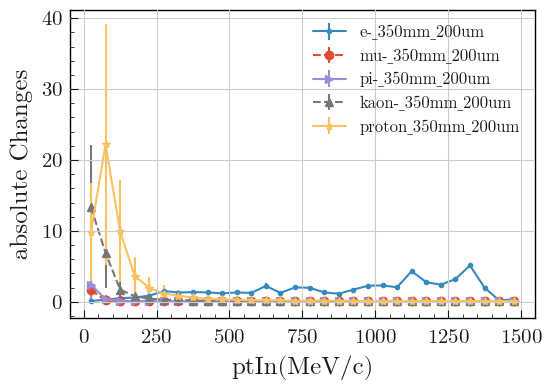

In [181]:
# x_var,y_var,range_x ='pIn(MeV/c)','dff_p',(0,1500)
# x_var,y_var,range_x ='pzIn(MeV/c)','dff_pz',(-1500,1500)
x_var,y_var,range_x ='ptIn(MeV/c)','dff_pt(MeV/c)',(0,1500)
# x_var,y_var,range_x ='thetaIn(rad)','dff_theta',(0,3.14)
# x_var,y_var,range_x ='thetaIn(rad)','dff_theta',(0,3.14)
# x_var,y_var,range_x ='phiIn','dff_phi',(-3.14,3.14)
plt.figure()

for p in particle:
    # plt.figure()
    for r in [350]:
    # for r in radius:
        for th in [200]:
            # plt.hist(df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um')
            # plt.hist(df[p][r][th][y_var]*100/df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um',bins =100,range =(0, 1))
            plot_profile(df[p][r][th],x_var, y_var, 
                         30, 100, range_x, (0,500), 
                f'{p}_{r}mm_{th}um', fmt=marker[p], use_eff=False,onlyEff=False, plot= True,plot_std=False)
            
            
plt.legend()
plt.ylabel('absolute Changes')
plt.grid()


In [6]:
def update_sep(df,p1,p2,err1,err2,colname='sep_'):

    print(p1, 'from ',np.sqrt(0.037**2) , '-> ',np.sqrt(0.037**2+err1**2) )
    print(p2, 'from ',np.sqrt(0.037**2) , '-> ',np.sqrt(0.037**2+err2**2) )
    df[colname] = (df['Gtime_smeared'] - df[f'expt_{p1}'])/np.sqrt(0.037**2+err1**2)
    df[colname] =df[colname] - (df['Gtime_smeared'] - df[f'expt_{p2}'])/np.sqrt(0.037**2+err2**2)
    df[colname] = abs(df[colname])
    return df
    

def update_sep_1(df,p1,p2,colname='sep_1'):

    df[colname] = (df['Gtime_smeared'] - df[f'expt_{p1}'])/np.sqrt(0.037**2)
    df[colname] =df[colname] - (df['Gtime_smeared'] - df[f'expt_{p2}'])/np.sqrt(0.037**2)
    # df[colname] = abs(df[colname])
    return df

def update_ss(df,p1,colname='sep_1',current_timing_reso_ns=0.03):

    df.loc[:, colname] = (df['Gtime_smeared'] - df[f'expt_{p1}']) /current_timing_reso_ns
    return df

def update_ss_rf(df,p1,err1, T_m='Gtime_smeared',colname='sep_1',smear = False, current_timing_reso_ns=0.03):
    
    print(p1, '\n from ',np.sqrt(current_timing_reso_ns**2) , '-> ',np.sqrt(current_timing_reso_ns**2+0.02**2+err1**2) )
    df.loc[:, colname] = (df[T_m] - df[f'expt_{p1}']) /np.sqrt(current_timing_reso_ns**2+0.02**2+err1**2)

    std_before = np.std(df.loc[:, colname])
    print(f'std before using {T_m} >>>', std_before)
    if abs(std_before-1)>0.02 and smear:
        print('std not unit -> will smear the Gtime_smeared')
        df.loc[:, f'{T_m}_offline'] = df[f'expt_{p1}'] + ((df[T_m] - df[f'expt_{p1}']))/std_before
        df.loc[:, colname] = (df[f'{T_m}_offline'] - df[f'expt_{p1}']) /np.sqrt(current_timing_reso_ns**2+0.02**2+err1**2)
        std_after = np.std(df.loc[:, colname])
        print('std is : >>> ',std_after)
    return df

def smear_Gtime(df, T_before='Gtime_smeared', T_after='Gtime_smeared_new', new_sigma_ns=0.02):
    old_sigma = df[T_before].std()

    if old_sigma == 0:
        raise ValueError(f"Column {T_before} has zero std, cannot rescale.")

    # scale deviations so std = new_sigma_ns
    mean_val = df[T_before].mean()
    df[T_after] = mean_val + (df[T_before] - mean_val) * (new_sigma_ns / old_sigma)

    return df
    
    
# for r in dis:
#     df_pion, df_kaon, _,_,_ = split_df(df[f'r_{r}'])    

#     # err1 = get_68(uncer[p1][f'{r}'].query(f'p_estimate>{pGev_m} and p_estimate<{pGev_l}')[f'toa_{p1}_residual'])
#     # err2 = get_68(uncer[p2][f'{r}'].query(f'p_estimate>{pGev_m} and p_estimate<{pGev_l}')[f'toa_{p2}_residual'])
#     # update_sep(df_pion,p1,p2,err1,err2,colname=var_y)
#     # update_sep(df_kaon,p1,p2,err1,err2,colname=var_y)

#     # update_sep_1(df_pion,p1,p2,colname=var_y1)
#     # update_sep_1(df_kaon,p1,p2,colname=var_y1)

#     update_ss(df_kaon,'kaon',colname='kaon_ss')
#     update_ss(df_pion,'pi',colname='pi_ss')

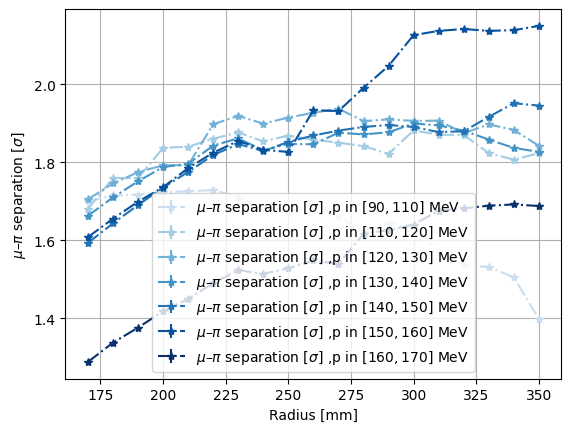

In [85]:
# ax1.set_ylabel("$k–\pi$ separation [$\sigma$]")
# ax1.set_ylim(0,100)
# fig.savefig(f"fig/scan_kpi_sep_eff_170_350mm_noTracking.pdf",bbox_inches='tight')

fig, ax1 = plt.subplots()
i=1
colors = plt.cm.Blues(np.linspace(0.1, 1.0, 8))
for P_for_plot in [[90,110],[110,120],[120,130],[130,140],[140,150],[150,160],[160,170]]:
    ax1.errorbar(distances, sig_[np.mean(P_for_plot)], yerr=0.0, fmt='*-.', 
                 color=colors[i],
                 label=f'$\mu–\pi$ separation [$\sigma$] ,p in ${P_for_plot}$ MeV')
    i=i+1
    # ax1.errorbar(distances, sig_1[np.mean(P_for_plot)], yerr=0.0, fmt='*-.', 
    #              # color='r',
    #              label=f'True pi: $k–\pi$ separation [$\sigma$] ,p in ${P_for_plot}$ MeV')
plt.legend()
plt.grid()

ax1.set_xlabel("Radius [mm]")
ax1.set_ylabel("$\mu–\pi$ separation [$\sigma$]")
fig.savefig(f"fig/scan_mupi_sep_eff_170_350mm_withTracking_smeared_offline.pdf",bbox_inches='tight')
    